# DBSCAN Example
## Generate Data

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Generate Random Values and Put Stack Them Vertically

In [20]:
X = np.random.multivariate_normal([0,0],[[1,0],[0,1]],1000)
Y = np.random.multivariate_normal([4,4],[[1,.1],[-.1,1]],1000)
Z = np.random.multivariate_normal([-6,6],[[1,0],[0,1]],1000)

W = np.vstack([X,Y,Z])

Plot Values

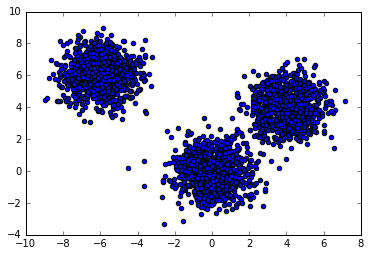

In [21]:
plt.figure()
plt.scatter(W[:,0],W[:,1])
plt.show()

## Clustering 

In [22]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [30]:
db = DBSCAN(eps=0.4, min_samples=10).fit(W)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [31]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [32]:
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


C:\Users\Gary\Anaconda3\lib\site-packages\matplotlib\lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


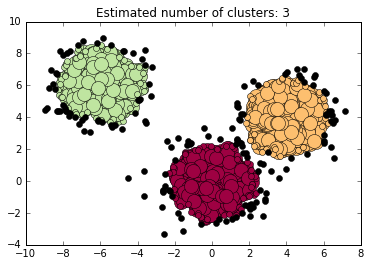

In [33]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = W[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = W[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()